In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(14,6)

In [2]:
price=np.array([20,28,39,51,75,130,210,400])
size=np.array([100,150,200,250,500,1000,2500,5000])
print(price,"\n", size)

[ 20  28  39  51  75 130 210 400] 
 [ 100  150  200  250  500 1000 2500 5000]


In [3]:
size.shape[0]

8

SETTING THE MATRICES AS PER NOTATION


In [4]:
# CALCULATE number of examples(m) and features(nx)
nx=1
m=size.shape[0]

# reshaping the input
X=size.reshape(nx,m)
y=price.reshape(1,m)

#initialising weights and biases
w=np.random.rand(nx).reshape(nx,1)
b=np.random.rand(nx).reshape(1,1)

In [5]:
print(X.shape,w.shape,b.shape)

(1, 8) (1, 1) (1, 1)


In [6]:
def linear(X,w,b):
  return np.dot(w.T,X)+b

In [7]:
yhat= linear(X,w,b)
print(yhat.shape)

(1, 8)


In [8]:
yhat

array([[  82.68376897,  123.83349895,  164.98322893,  206.13295892,
         411.88160883,  823.37890865, 2057.87080813, 4115.35730725]])

COST FUNCTION

In [9]:
def cost(x,y,w,b):
  yhat=linear(x,w,b)
  #print(yhat.shape,y.shape)
  error = np.subtract(yhat,y)
  #print(error,error.shape)
  error_squared=np.power(error,2)
  J=np.sum(error_squared,axis=1)
  #J=np.sum(np.multiply(yhat-y), (yhat-y)), axis=1)
  #J=np.dot((yhat-y), (yhat-y).T)
  return J/(2*x.shape[0])             #x.shape[0] is equal to m


In [10]:
cost(X,y,np.array([0.1]),0)

array([7215.5])

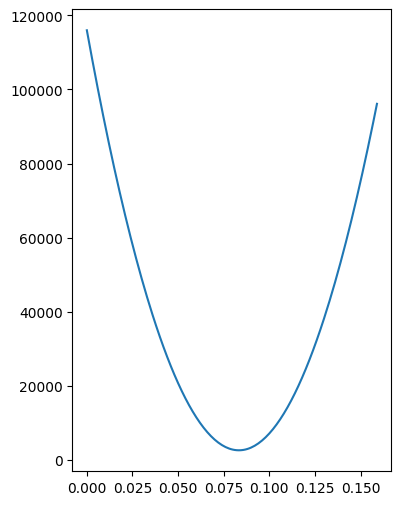

In [11]:
#initialize array to store J for plotting
#plt.rcParams["figure.figsize"] = (20,8)
plotJ=np.array([0,0])
for i in range(160):
  J=cost(X,y,np.array([(i/1000,0)]),0)
  plotJ = np.vstack((plotJ,[i/1000,J[0]]))
  #print(i/1000,y,J)
  #print(J)
ax1=plt.subplot(131)
plt.plot(plotJ[1:,0],plotJ[1:,1])

In [12]:
#minimum loss and its corresponding weight
minloss=np.min(plotJ[1:,1])
print(minloss, np.where(plotJ[1:,1] == minloss))

2679.0074999999997 (array([83]),)


GRADIENT DESCENT

In [13]:
#NORMALISATION
X_norm=X/np.max(X)
X_norm.shape

(1, 8)

PYTHON IMPLEMENTATION

In [14]:
learning_rate=0.01
max_iteration=5000
cost=np.zeros((max_iteration))
wPlot=np.zeros((max_iteration))
bPlot=np.zeros((max_iteration))
#print(X_norm)
w=np.zeros(1).reshape(1,1)
b=np.zeros(1).reshape(1,1)
for i in range(max_iteration):
  yhat=linear(X_norm,w,b)
  error=np.subtract(yhat,y)
  #print(error,error.shape)
  error_squared=np.power(error,2)
  #J=np.sum(error_squared,axis=1)
  #J=np.sum(np.multiply((yhat-y), (yhat-y), axis=1)
  J=np.dot((yhat-y), (yhat-y).T)
  cost[i]=J/(2*X_norm.shape[0])
  #print(cost[i])
  dw_sum=np.sum((yhat-y)*X_norm,axis=1)
  #print("dw_sum", dw_sum)
  #dw=dw_sum/X_norm.shape[0]
  dw=(1/X_norm.shape[0])*np.dot(X_norm,(yhat-y).T)
  db=np.sum((yhat-y), axis=1)/X_norm.shape[0]
  w=w-learning_rate*dw
  b=b-learning_rate*db
  wPlot[i]=w
  bPlot[i]=b



In [15]:
print(w,b)

[[374.57033355]] [[28.29169411]]


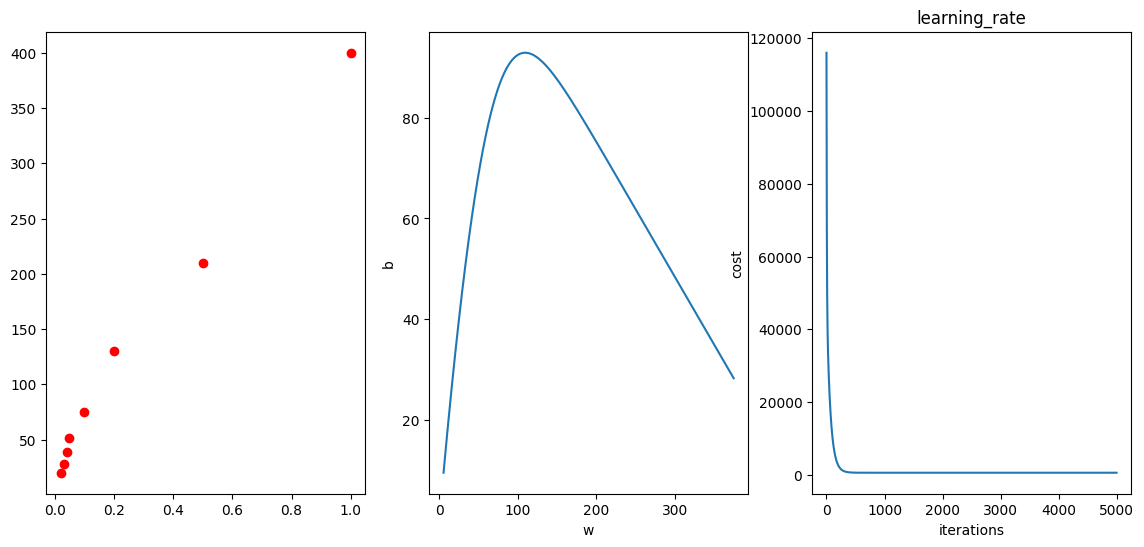

In [16]:
ax1=plt.subplot(131)
plt.scatter(X_norm,y,color="red")
ax2=plt.subplot(132)
plt.xlabel('w')
plt.ylabel('b')
ax2.plot(wPlot,bPlot)
#plot learning curve  (with costs)
ax3=plt.subplot(133)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('learning_rate')
plt.show()
